# Finemapping using susieR

## Data preparation

In [1]:
import gwaslab as gl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sumstats = gl.Sumstats("../06_Association_tests/1kgeas.B1.glm.firth",fmt="plink2")

Fri Jan 13 23:31:25 2023 Start to load format from formatbook....
Fri Jan 13 23:31:25 2023  -plink2 format meta info:
Fri Jan 13 23:31:25 2023   - format_name  : PLINK2 .glm.firth, .glm.logistic,.glm.linear
Fri Jan 13 23:31:25 2023   - format_source  : https://www.cog-genomics.org/plink/2.0/formats
Fri Jan 13 23:31:25 2023   - format_version  : Alpha 3.3 final (3 Jun)
Fri Jan 13 23:31:25 2023   - last_check_date  :  20220806
Fri Jan 13 23:31:25 2023  -plink2 format dictionary:
Fri Jan 13 23:31:25 2023   - plink2 keys: ID,#CHROM,POS,REF,ALT,A1,OBS_CT,A1_FREQ,BETA,LOG(OR)_SE,SE,Z_STAT,P,LOG10_P,MACH_R2,OR,L95,U95
Fri Jan 13 23:31:25 2023   - gwaslab values: SNPID,CHR,POS,REF,ALT,EA,N,EAF,BETA,SE,SE,Z,P,MLOG10P,INFO,OR,OR_95L,OR_95U
Fri Jan 13 23:31:25 2023 Start to initiate from file :../06_Association_tests/1kgeas.B1.glm.firth
Fri Jan 13 23:31:27 2023  -Reading columns          : OR,OBS_CT,Z_STAT,P,#CHROM,POS,REF,LOG(OR)_SE,ID,ALT,A1
Fri Jan 13 23:31:27 2023  -Renaming columns to      :

In [3]:
sumstats.basic_check()

Fri Jan 13 23:31:28 2023 Start to check IDs...
Fri Jan 13 23:31:28 2023  -Current Dataframe shape : 1122299  x  11
Fri Jan 13 23:31:28 2023  -Checking if SNPID is chr:pos:ref:alt...(separator: - ,: , _)
Fri Jan 13 23:31:30 2023 Finished checking IDs successfully!
Fri Jan 13 23:31:30 2023 Start to fix chromosome notation...
Fri Jan 13 23:31:30 2023  -Current Dataframe shape : 1122299  x  11
Fri Jan 13 23:31:33 2023  -Vairants with standardized chromosome notation: 1122299
Fri Jan 13 23:31:35 2023  -All CHR are already fixed...
Fri Jan 13 23:31:36 2023 Finished fixing chromosome notation successfully!
Fri Jan 13 23:31:36 2023 Start to fix basepair positions...
Fri Jan 13 23:31:36 2023  -Current Dataframe shape : 1122299  x  11
Fri Jan 13 23:31:36 2023  -Converting to Int64 data type ...
Fri Jan 13 23:31:37 2023  -Position upper_bound is: 250,000,000
Fri Jan 13 23:31:39 2023  -Remove outliers: 0
Fri Jan 13 23:31:39 2023  -Converted all position to datatype Int64.
Fri Jan 13 23:31:39 2023 

In [4]:
sumstats.get_lead()

Fri Jan 13 23:31:43 2023 Start to extract lead variants...
Fri Jan 13 23:31:43 2023  -Processing 1122285 variants...
Fri Jan 13 23:31:43 2023  -Significance threshold : 5e-08
Fri Jan 13 23:31:43 2023  -Sliding window size: 500  kb
Fri Jan 13 23:31:44 2023  -Found 59 significant variants in total...
Fri Jan 13 23:31:44 2023  -Identified 3 lead variants!
Fri Jan 13 23:31:44 2023 Finished extracting lead variants successfully!


,SNPID,CHR,POS,EA,NEA,SE,Z,P,OR,N,STATUS
110723,2:55574452:G:C,2,55574452,C,G,0.160948,-5.98392,2.178320e-09,0.381707,503,9960099
424615,6:29919659:T:C,6,29919659,T,C,0.155457,-5.89341,3.782970e-09,0.400048,503,9960099
635128,9:36660672:A:G,9,36660672,G,A,0.160275,5.63422,1.758540e-08,2.467060,503,9960099


Fri Jan 13 23:32:18 2023 Start to plot manhattan/qq plot with the following basic settings:
Fri Jan 13 23:32:18 2023  -Genome-wide significance level is set to 5e-08 ...
Fri Jan 13 23:32:18 2023  -Raw input contains 1122285 variants...
Fri Jan 13 23:32:18 2023  -Plot layout mode is : mqq
Fri Jan 13 23:32:19 2023 Finished loading specified columns from the sumstats.
Fri Jan 13 23:32:19 2023 Start conversion and sanity check:
Fri Jan 13 23:32:19 2023  -Removed 0 variants with nan in CHR or POS column ...
Fri Jan 13 23:32:19 2023  -Removed 0 variants with nan in P column ...
Fri Jan 13 23:32:19 2023  -P values are being converted to -log10(P)...
Fri Jan 13 23:32:19 2023  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
Fri Jan 13 23:32:19 2023  -Sanity check: 0 na/inf/-inf variants will be removed...
Fri Jan 13 23:32:19 2023  -Maximum -log10(P) values is 8.661878321078913 .
Fri Jan 13 23:32:19 2023 Finished data conversion and sanity check.
Fri J

(<Figure size 3000x1000 with 2 Axes>, <gwaslab.Log.Log at 0x7f70c4ac3280>)

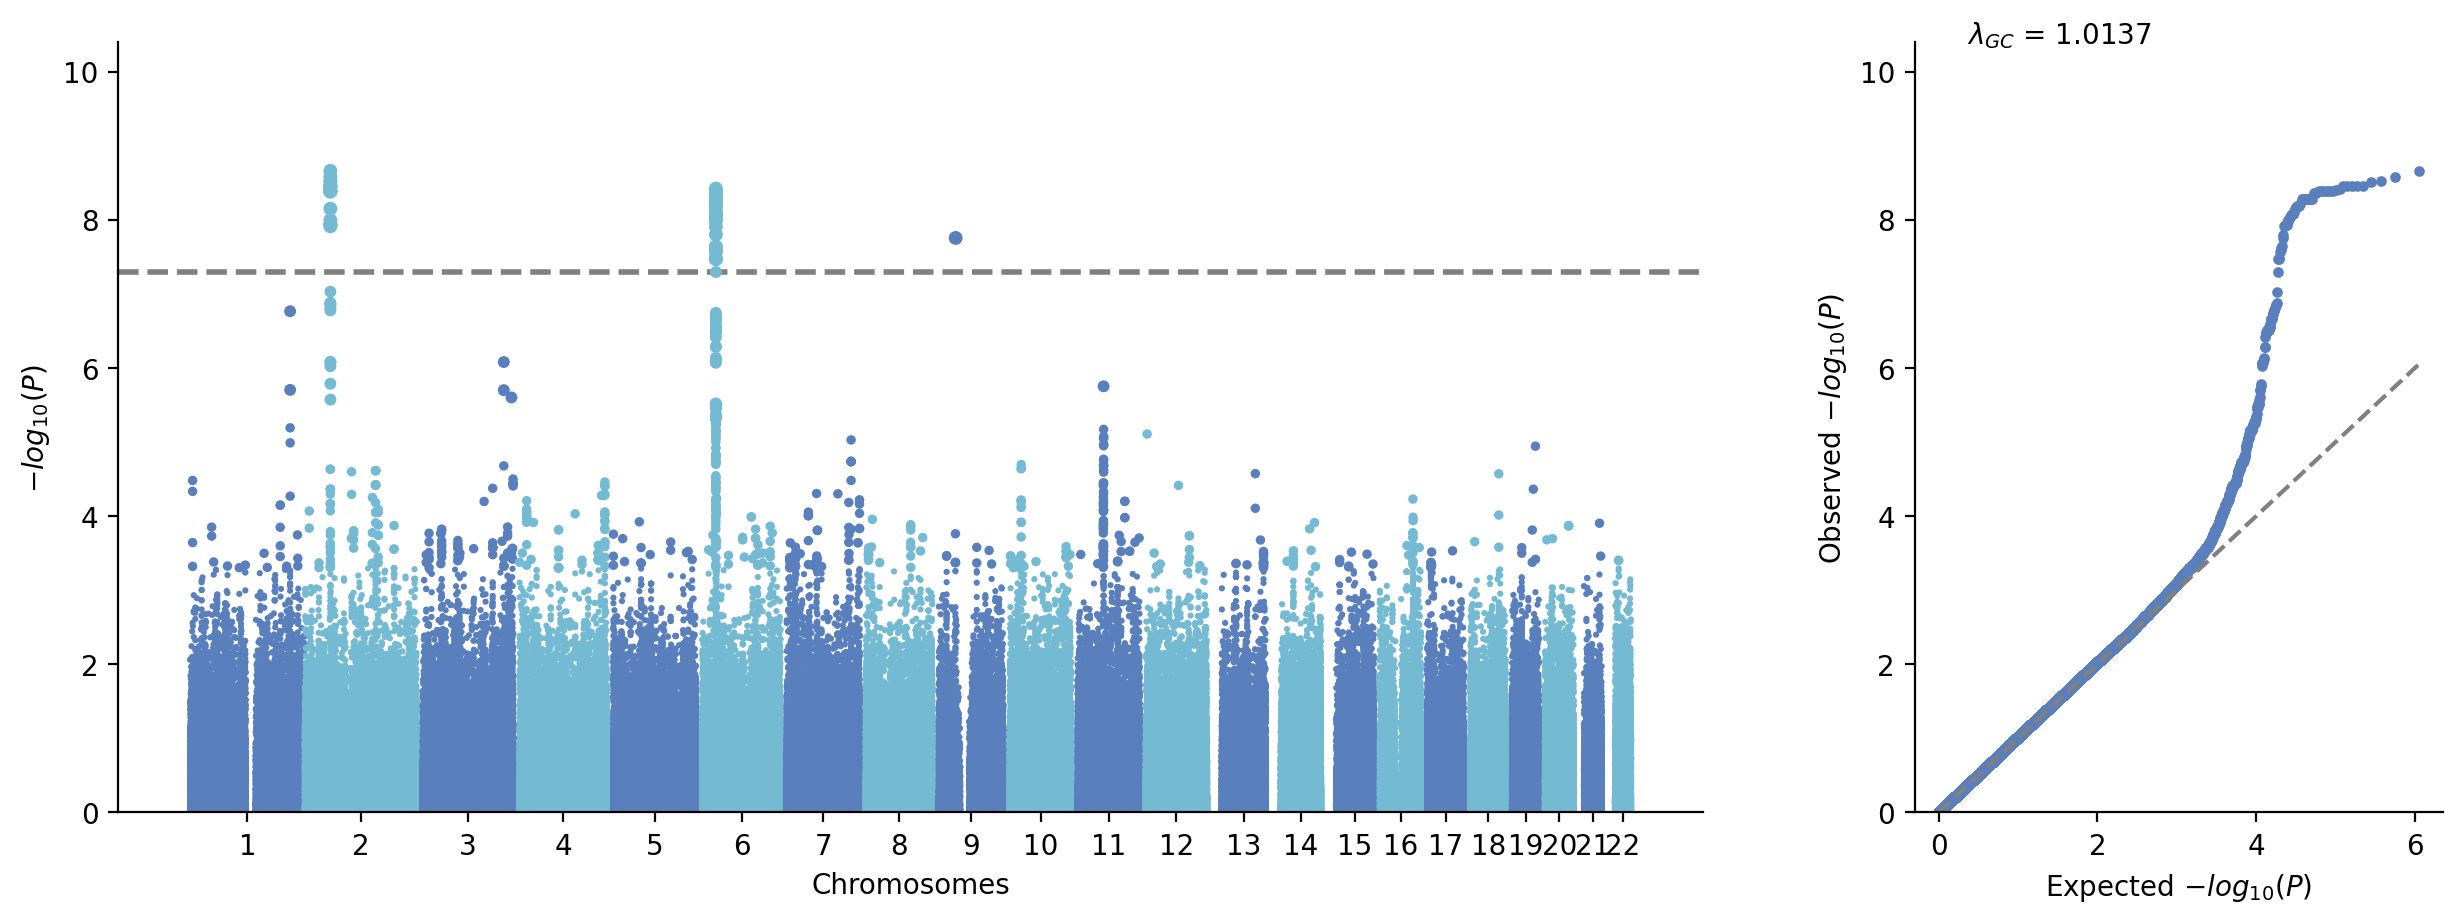

In [5]:
sumstats.plot_mqq()

In [6]:
locus = sumstats.filter_value('CHR==2 & POS>55074452 & POS<56074452')

Fri Jan 13 23:35:52 2023 Start filtering values by condition: CHR==2 & POS>55074452 & POS<56074452
Fri Jan 13 23:35:52 2023  -Removing 1121871 variants not meeting the conditions: CHR==2 & POS>55074452 & POS<56074452
Fri Jan 13 23:35:52 2023 Finished filtering values.


In [7]:
locus.fill_data(to_fill=["BETA"])

Fri Jan 13 23:35:53 2023 Start filling data using existing columns...
Fri Jan 13 23:35:53 2023  -Raw input columns:  ['SNPID', 'CHR', 'POS', 'EA', 'NEA', 'SE', 'Z', 'P', 'OR', 'N', 'STATUS']
Fri Jan 13 23:35:53 2023  -Overwrite mode:  False
Fri Jan 13 23:35:53 2023   -Skipping columns:  []
Fri Jan 13 23:35:53 2023  -Filling columns:  ['BETA']
Fri Jan 13 23:35:53 2023   - Filling BETA value using OR column...
Fri Jan 13 23:35:53 2023 Start to reorder the columns...
Fri Jan 13 23:35:53 2023  -Current Dataframe shape : 414  x  12
Fri Jan 13 23:35:53 2023  -Reordering columns to    : SNPID,CHR,POS,EA,NEA,BETA,SE,Z,P,OR,N,STATUS
Fri Jan 13 23:35:53 2023 Finished sorting columns successfully!
Fri Jan 13 23:35:53 2023 Finished filling data using existing columns.


In [8]:
locus.data

,SNPID,CHR,POS,EA,NEA,BETA,SE,Z,P,OR,N,STATUS
110525,2:55079388:C:T,2,55079388,T,C,0.202002,0.136354,1.481440,0.138489,1.223850,503,9960099
110526,2:55079654:A:T,2,55079654,A,T,0.127813,0.134046,0.953532,0.340321,1.136340,503,9960099
110527,2:55080703:A:C,2,55080703,C,A,0.074476,0.146341,0.508943,0.610792,1.077320,503,9960099
110528,2:55086992:G:A,2,55086992,A,G,-0.215296,0.310284,-0.693867,0.487766,0.806303,503,9960099
110529,2:55087887:C:T,2,55087887,T,C,-0.060114,0.156980,-0.382945,0.701761,0.941657,503,9960099
...,...,...,...,...,...,...,...,...,...,...,...,...
110934,2:56046438:G:A,2,56046438,G,A,0.314869,0.212066,1.484760,0.137608,1.370080,503,9960099
110935,2:56047038:G:A,2,56047038,G,A,0.209783,0.171107,1.226050,0.220179,1.233410,503,9960099
110936,2:56048107:G:C,2,56048107,G,C,0.241290,0.169689,1.421930,0.155046,1.272890,503,9960099
110937,2:56074410:C:A,2,56074410,C,A,0.239607,0.203371,1.178200,0.238719,1.270750,503,9960099


In [9]:
locus.data.to_csv("sig_locus.tsv",sep="\t",index=None)
locus.data["SNPID"].to_csv("sig_locus.snplist",sep="\t",index=None,header=None)

## Finemapping 

In [15]:
import rpy2
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
import rpy2.robjects.numpy2ri as numpy2ri
numpy2ri.activate()

INFO:rpy2.situation:cffi mode is CFFI_MODE.ANY
INFO:rpy2.situation:R home found: /usr/lib/R
INFO:rpy2.situation:R library path: /usr/lib/R/lib:/usr/lib/x86_64-linux-gnu:/usr/lib/jvm/default-java/lib/server
INFO:rpy2.situation:LD_LIBRARY_PATH: /usr/lib/R/lib:/usr/lib/x86_64-linux-gnu:/usr/lib/jvm/default-java/lib/server
INFO:rpy2.rinterface_lib.embedded:Default options to initialize R: rpy2, --quiet, --no-save
INFO:rpy2.rinterface_lib.embedded:R is already initialized. No need to initialize.


In [16]:
df = pd.read_csv("sig_locus.tsv",sep="\t")
df 

,SNPID,CHR,POS,EA,NEA,BETA,SE,Z,P,OR,N,STATUS
0,2:55079388:C:T,2,55079388,T,C,0.202002,0.136354,1.481440,0.138489,1.223850,503,9960099
1,2:55079654:A:T,2,55079654,A,T,0.127813,0.134046,0.953532,0.340321,1.136340,503,9960099
2,2:55080703:A:C,2,55080703,C,A,0.074476,0.146341,0.508943,0.610792,1.077320,503,9960099
3,2:55086992:G:A,2,55086992,A,G,-0.215296,0.310284,-0.693867,0.487766,0.806303,503,9960099
4,2:55087887:C:T,2,55087887,T,C,-0.060114,0.156980,-0.382945,0.701761,0.941657,503,9960099
...,...,...,...,...,...,...,...,...,...,...,...,...
409,2:56046438:G:A,2,56046438,G,A,0.314869,0.212066,1.484760,0.137608,1.370080,503,9960099
410,2:56047038:G:A,2,56047038,G,A,0.209783,0.171107,1.226050,0.220179,1.233410,503,9960099
411,2:56048107:G:C,2,56048107,G,C,0.241290,0.169689,1.421930,0.155046,1.272890,503,9960099
412,2:56074410:C:A,2,56074410,C,A,0.239607,0.203371,1.178200,0.238719,1.270750,503,9960099


In [17]:
# import susieR as object
susieR = importr('susieR')

In [18]:
# convert pd.DataFrame to numpy
ld = pd.read_csv("sig_locus_mt.ld",sep="\t",header=None)
R_df = ld.values

In [19]:
R_df

array([[ 1.        , -0.766746  ,  0.850204  , ...,  0.016145  ,
        -0.0543754 , -0.0664124 ],
       [-0.766746  ,  1.        , -0.646211  , ..., -0.00602064,
         0.0680547 ,  0.0639558 ],
       [ 0.850204  , -0.646211  ,  1.        , ...,  0.034304  ,
        -0.0402253 , -0.0526333 ],
       ...,
       [ 0.016145  , -0.00602064,  0.034304  , ...,  1.        ,
         0.536946  ,  0.586261  ],
       [-0.0543754 ,  0.0680547 , -0.0402253 , ...,  0.536946  ,
         1.        ,  0.91945   ],
       [-0.0664124 ,  0.0639558 , -0.0526333 , ...,  0.586261  ,
         0.91945   ,  1.        ]])

https://stephenslab.github.io/susieR/articles/finemapping_summary_statistics.html#fine-mapping-with-susier-using-summary-statistics

In [20]:
ro.r('set.seed(2932)')
fit = susieR.susie_rss(
    bhat = df["BETA"].values.reshape((len(R_df),1)),
    shat = df["SE"].values.reshape((len(R_df),1)),
    R = R_df,
    L = 10,
    n = 503
)

In [21]:
fit

<rpy2.robjects.vectors.ListVector object at 0x7f70eea71900> [RTYPES.VECSXP]
R classes: ('susie',)
[FloatSexp..., FloatSexp..., FloatSexp..., FloatSexp..., ..., FloatSexp..., FloatSexp..., ListSexpV..., FloatSexp...]
  alpha: <class 'numpy.ndarray'>
  array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
  mu: <class 'numpy.ndarray'>
  array([[-7.94306889,  4.74772213, -6.2134761 , ...,  2.68252702,
         2.44717446,  4.84789608],
       [ 8.11534259, -4.68621188,  6.29023207, ..., -2.56886926,
        -2.35406213, -4.71110522],
       [-8.0189753 ,  4.79231533, -6.27257981, ...,  2.70734982,
         2.4698694 ,  4.89308047],
       ...,
       [ 8.15159022, -4.70750649,  6.31845589, ..., -2.5807229 ,
        -2.36489966, -4.73268214],
       [-8.01951399,  4.7926318 , -6.27299925, ...,  2.70752598,
         2.47003046,  4.89340113],
       [ 8.15157915, -4.70749999,  6.31844728, ..., -2.58071928,
        -2.36489635, -4.73267555]])
  mu2: <class 'numpy.ndarray'>
  array([[63.09433547, 22.54285741, 38.60927732, ...,  7.19794325,
         5.99065489, 23.50408847],
       [65.86077745, 21.96257379, 39.56901156, ...,  6.60108128,
         5.54360055, 22.19650439],
       [64.30595692, 22.96827827, 39.34724946, ...,  7.33173506,
         6.10224689, 23.94422853],
       ...,
       [66.45041515, 22.16260941, 39.92487692, ...,  6.6621227 ,
         5.59474241, 22.40027225],
       [64.31459663, 22.97131158, 39.35251161, ...,  7.33268895,
         6.10304251, 23.94736667],
       [66.45023471, 22.16254819, 39.92476801, ...,  6.66210401,
         5.59472676, 22.40020989]])
  KL: <class 'numpy.ndarray'>
  array([11.95833737, 12.36878275, 11.96772279, 12.3732746 , 11.96781222,
       12.37325868, 11.96779548, 12.3732533 , 11.96778909, 12.37325194])
...
  lbf_variable: <class 'numpy.ndarray'>
  array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])
  sigma2: <class 'numpy.ndarray'>
  array([nan])
<rpy2.robjects.vectors.ListVector object at 0x7f70eea71900> [RTYPES.VECSXP]
R classes: ('susie',)
[FloatSexp..., 

In [22]:
df["MLOG10P"] = -np.log10(df["P"])

In [23]:
df["cs"] = 0
n_cs=len(susieR.susie_get_cs(fit, coverage = 0.95,min_abs_corr = 0.5,Xcorr = R_df)[0])
for i in range(n_cs):
    cs_index = susieR.susie_get_cs(fit,coverage = 0.95,min_abs_corr = 0.5,Xcorr = R_df)[0][i]
    df.loc[cs_index-1,"cs"] = i + 1
df["pip"] = np.array(susieR.susie_get_pip(fit))

/tmp/ipykernel_36344/201488935.py:11: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[0].scatter(df.loc[(df["CHR"]==2)&(df["POS"]==55620927),"POS"],df.loc[(df["CHR"]==2)&(df["POS"]==55620927),col_to_plot],


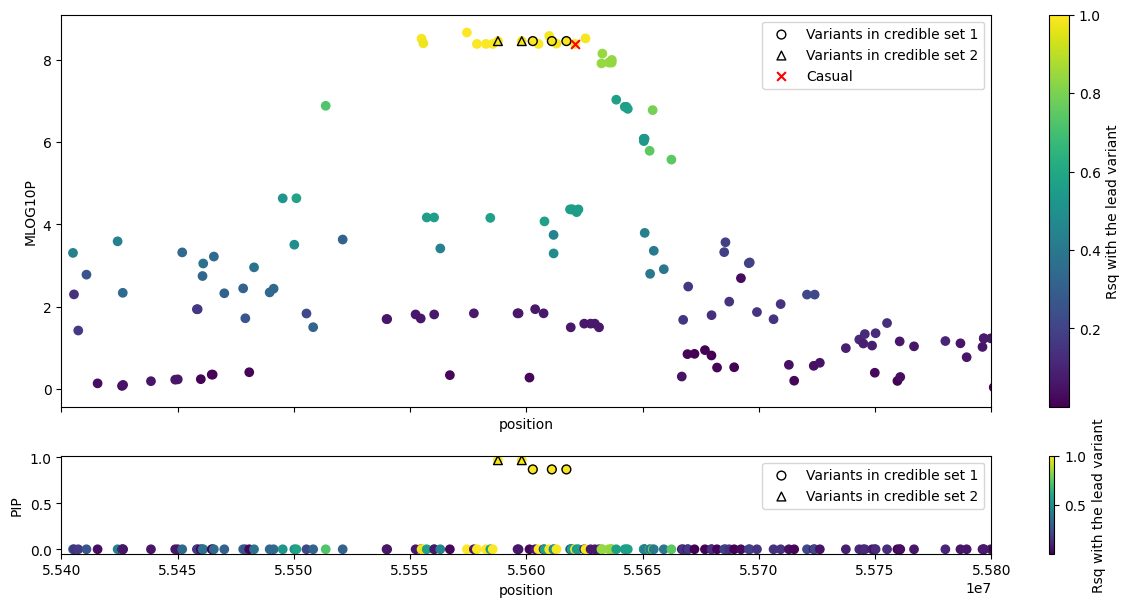

In [24]:
fig ,axes = plt.subplots(nrows=2,sharex=True,figsize=(15,7),height_ratios=(4,1))

col_to_plot = "MLOG10P"
p=axes[0].scatter(df["POS"],df[col_to_plot],c=ld[df["P"].idxmin()]**2)

axes[0].scatter(df.loc[df["cs"]==1,"POS"],df.loc[df["cs"]==1,col_to_plot],
           marker='o',s=40,c="None",edgecolors='black',label="Variants in credible set 1")
axes[0].scatter(df.loc[df["cs"]==2,"POS"],df.loc[df["cs"]==2,col_to_plot],
           marker='^',s=40,c="None",edgecolors='black',label="Variants in credible set 2")

#axes[0].scatter(df.loc[(df["CHR"]==2)&(df["POS"]==55620927),"POS"],df.loc[(df["CHR"]==2)&(df["POS"]==55620927),col_to_plot],
#           marker='x',s=40,c="red",edgecolors='black',label="Casual")

plt.colorbar( p , label="Rsq with the lead variant")
axes[0].set_xlabel("position")
axes[0].set_xlim((55400000, 55800000))
axes[0].set_ylabel(col_to_plot)
axes[0].legend()

p=axes[1].scatter(df["POS"],df["pip"],c=ld[df["P"].idxmin()]**2)

axes[1].scatter(df.loc[df["cs"]==1,"POS"],df.loc[df["cs"]==1,"pip"],
           marker='o',s=40,c="None",edgecolors='black',label="Variants in credible set 1")
axes[1].scatter(df.loc[df["cs"]==2,"POS"],df.loc[df["cs"]==2,"pip"],
           marker='^',s=40,c="None",edgecolors='black',label="Variants in credible set 2")
plt.colorbar( p , label="Rsq with the lead variant")
axes[1].set_xlabel("position")
axes[1].set_xlim((55400000, 55800000))
axes[1].set_ylabel("PIP")
axes[1].legend()

